In [3]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
directory = '/kaggle/input/project-1-dl/imgs/train'
test_directory = '/kaggle/input/project-1-dl/imgs/test'
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
img_size = 240

In [5]:
def show_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [6]:
training_data = []
def create_training_data():
    for category in classes:
        path = os.path.join(directory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_img = cv2.resize(img_array, (img_size, img_size))
                training_data.append([resized_img, class_num])
            except Exception as e:
                print(f"Error processing {img}: {e}")

In [7]:
create_training_data()
print(f"Total training samples: {len(training_data)}")

Total training samples: 22424


In [8]:
random.shuffle(training_data)

In [9]:
x, y = zip(*training_data)
x = np.array(x).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=96)

In [11]:
Y_train = to_categorical(y_train, num_classes=len(classes))
Y_test = to_categorical(y_test, num_classes=len(classes))

In [12]:
model = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), padding='same'),
    Dropout(0.5),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(len(classes), activation='softmax')  # Output layer with 'softmax' activation
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 238, 238, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 238, 238, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 238, 238, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 238, 238, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 119, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 119, 119, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 119, 119, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 119, 119, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 119, 119, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 119, 119, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 59,340,714 (226.37 MB)

 Trainable params: 59,338,794 (226.36 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6, verbose=1)

In [16]:
results = model.fit(
    x_train, Y_train,
    batch_size=32,
    epochs=25,
    validation_data=(x_test, Y_test),
    callbacks=[model_checkpoint, early_stopping, reduce_lr])

Epoch 1/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 131s 255ms/step - accuracy: 0.5102 - loss: 1.5779 - val_accuracy: 0.9541 - val_loss: 0.1419 - learning_rate: 0.0010
Epoch 2/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 94s 222ms/step - accuracy: 0.9411 - loss: 0.1848 - val_accuracy: 0.9386 - val_loss: 0.1969 - learning_rate: 0.0010
Epoch 3/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 98s 232ms/step - accuracy: 0.9602 - loss: 0.1182 - val_accuracy: 0.9761 - val_loss: 0.0861 - learning_rate: 0.0010
Epoch 4/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 98s 232ms/step - accuracy: 0.9746 - loss: 0.0799 - val_accuracy: 0.9829 - val_loss: 0.0633 - learning_rate: 0.0010
Epoch 5/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 93s 221ms/step - accuracy: 0.9775 - loss: 0.0626 - val_accuracy: 0.9208 - val_loss: 0.3099 - learning_rate: 0.0010
Epoch 6/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 93s 221ms/step - accuracy: 0.9694 - loss: 0.0884 - val_accuracy: 0.9809 - val_loss: 0.0645 - learning_rate: 0.0010
Epoch 7/25
421/421 ━━━━━━━━━━━━━━━━━━━━ 97s 230ms/step - accuracy: 0.

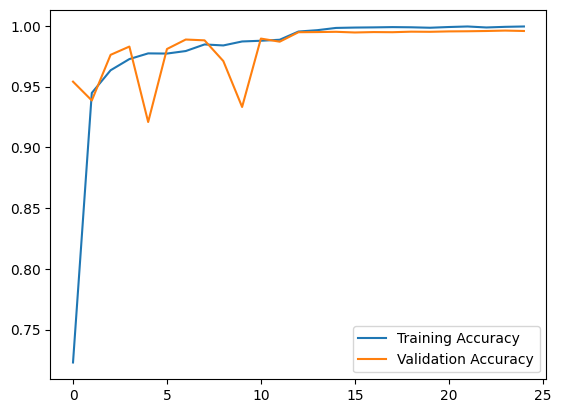

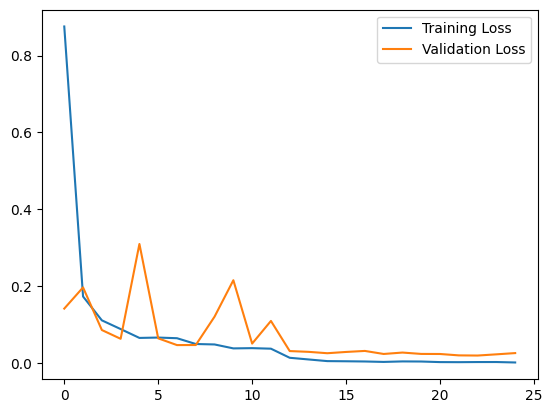

In [17]:
plt.plot(results.history['accuracy'], label='Training Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(results.history['loss'], label='Training Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [18]:
pred_probs = model.predict(x_test)
pred = np.argmax(pred_probs, axis=1)

281/281 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step


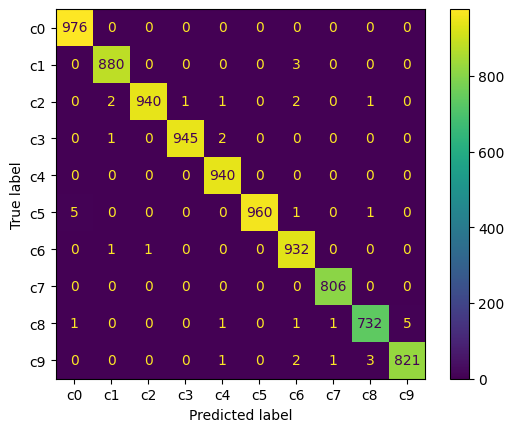

In [19]:
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')
plt.show()

In [20]:
print(classification_report(y_test, pred, target_names=classes))

              precision    recall  f1-score   support

          c0       0.99      1.00      1.00       976
          c1       1.00      1.00      1.00       883
          c2       1.00      0.99      1.00       947
          c3       1.00      1.00      1.00       948
          c4       0.99      1.00      1.00       940
          c5       1.00      0.99      1.00       967
          c6       0.99      1.00      0.99       934
          c7       1.00      1.00      1.00       806
          c8       0.99      0.99      0.99       741
          c9       0.99      0.99      0.99       828

    accuracy                           1.00      8970
   macro avg       1.00      1.00      1.00      8970
weighted avg       1.00      1.00      1.00      8970



Testing with image: /kaggle/input/project-1-dl/imgs/test/img_48258.jpg


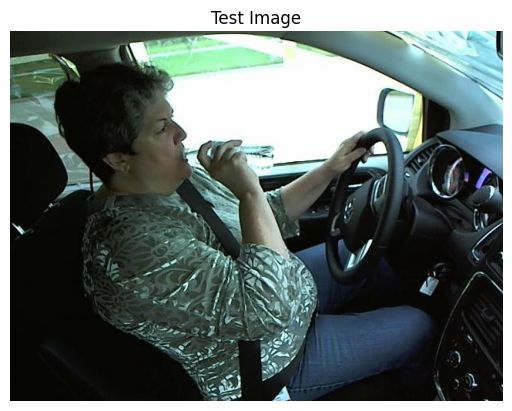

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: c6


In [43]:
# Test
random_filename = random.choice(os.listdir(test_directory))
test_img_path = os.path.join(test_directory, random_filename)
print(f"Testing with image: {test_img_path}")

test_img = cv2.imread(test_img_path, cv2.IMREAD_COLOR)
resized_test_img = cv2.resize(test_img, (img_size, img_size))
show_image(test_img, title="Test Image")

prediction = model.predict(resized_test_img.reshape(1, img_size, img_size, 3))
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {classes[predicted_class]}")

# c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger